# Brain Tumor Classification CNN-DL (MRI)

## Proje [linki](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
train_path = "/kaggle/input/brain-tumor-classification-mri/Training"
test_path = "/kaggle/input/brain-tumor-classification-mri/Testing"

In [3]:
import cv2
img = cv2.imread("/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(80).jpg")
img.shape

(236, 236, 3)

In [36]:
import cv2
img = cv2.imread("/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(35).jpg")
img.shape

(210, 201, 3)

In [20]:
height = 210
width = 210
batch_size = 25
seed = 73

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(test_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 2297 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


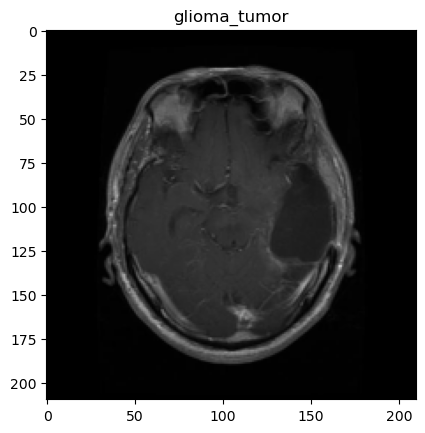

In [22]:
import matplotlib.pyplot as plt

# Veri kümesinden rastgele bir görüntü seçin
image_batch, label_batch = next(iter(train_dataset))

aziz = np.random.randint(len(image_batch)-1, size=1)[0] # rastgele veriye bakmak için

image = image_batch[aziz]
label = label_batch[aziz]

# Sınıf indekslerinden sınıf adlarına dönüştürme
class_names = list(train_dataset.class_indices.keys())
label = class_names[label.argmax()]

# Görüntüyü ve labelleri gösterme
plt.imshow(image)
plt.title(label)
plt.show()

# Derin Öğrenme ve CNN (Convolutional Neural Network)

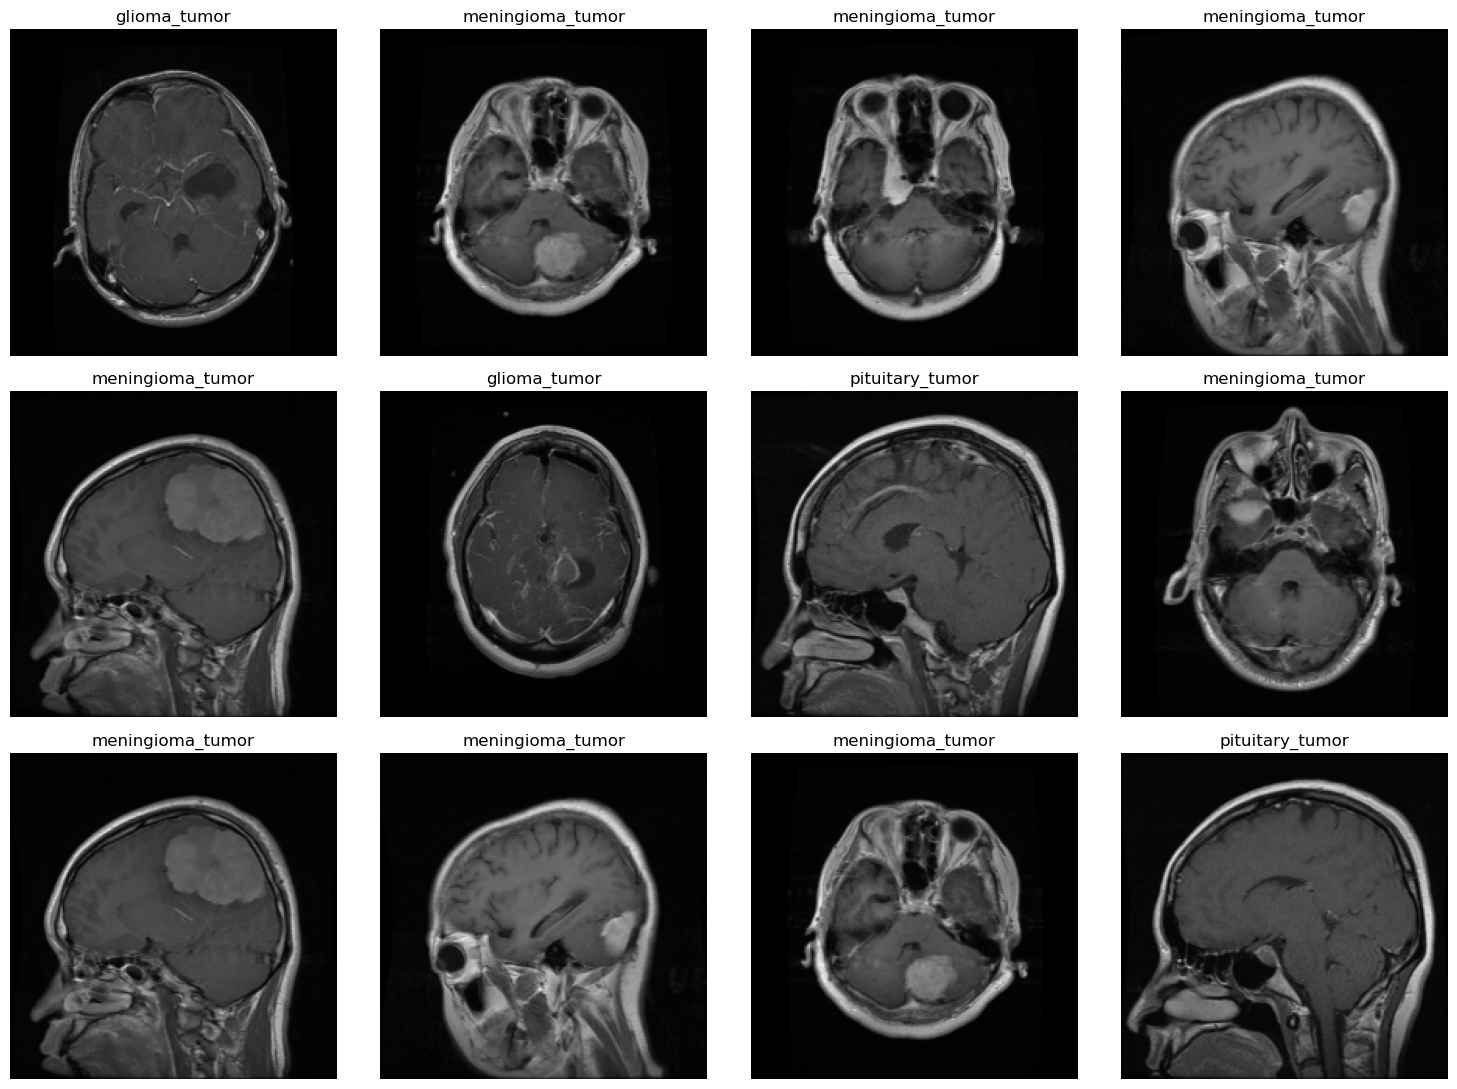

In [39]:
import random as rn
import matplotlib.pyplot as plt
fig,ax = plt.subplots(3,4)
fig.set_size_inches(15,11)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        aziz = rn.randint(0,batch_size-1)
        label = list(train_dataset.class_indices.keys())[np.argmax(y[aziz])]
        ax[i,j].imshow(img[aziz])
        ax[i,j].set_title(label)
        ax[i,j].axis("off")        

plt.tight_layout()

In [24]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [25]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=8, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    
    keras.layers.Dense(4, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 206, 206, 8)       608       
                                                                 
 conv2d_5 (Conv2D)           (None, 202, 202, 64)      12864     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 101, 101, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 101, 101, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 99, 99, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 128)     

In [27]:
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
epochs = 20
history = model.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=epochs, validation_data=test_dataset, validation_steps=len(test_dataset))

Epoch 1/20
92/92 [==============================] - 326s 4s/step - loss: 0.8211 - accuracy: 0.6892 - val_loss: 3.1053 - val_accuracy: 0.1923
Epoch 2/20
92/92 [==============================] - 324s 4s/step - loss: 0.5401 - accuracy: 0.7919 - val_loss: 3.9420 - val_accuracy: 0.1795
Epoch 3/20
92/92 [==============================] - 322s 3s/step - loss: 0.4079 - accuracy: 0.8507 - val_loss: 3.3599 - val_accuracy: 0.2051
Epoch 4/20
92/92 [==============================] - 322s 3s/step - loss: 0.3153 - accuracy: 0.8938 - val_loss: 1.9115 - val_accuracy: 0.4359
Epoch 5/20
92/92 [==============================] - 322s 3s/step - loss: 0.2173 - accuracy: 0.9299 - val_loss: 2.0570 - val_accuracy: 0.4359
Epoch 6/20
92/92 [==============================] - 324s 4s/step - loss: 0.1755 - accuracy: 0.9434 - val_loss: 1.7814 - val_accuracy: 0.5769
Epoch 7/20
92/92 [==============================] - 322s 4s/step - loss: 0.1214 - accuracy: 0.9673 - val_loss: 2.5186 - val_accuracy: 0.5641
Epoch 8/20
92

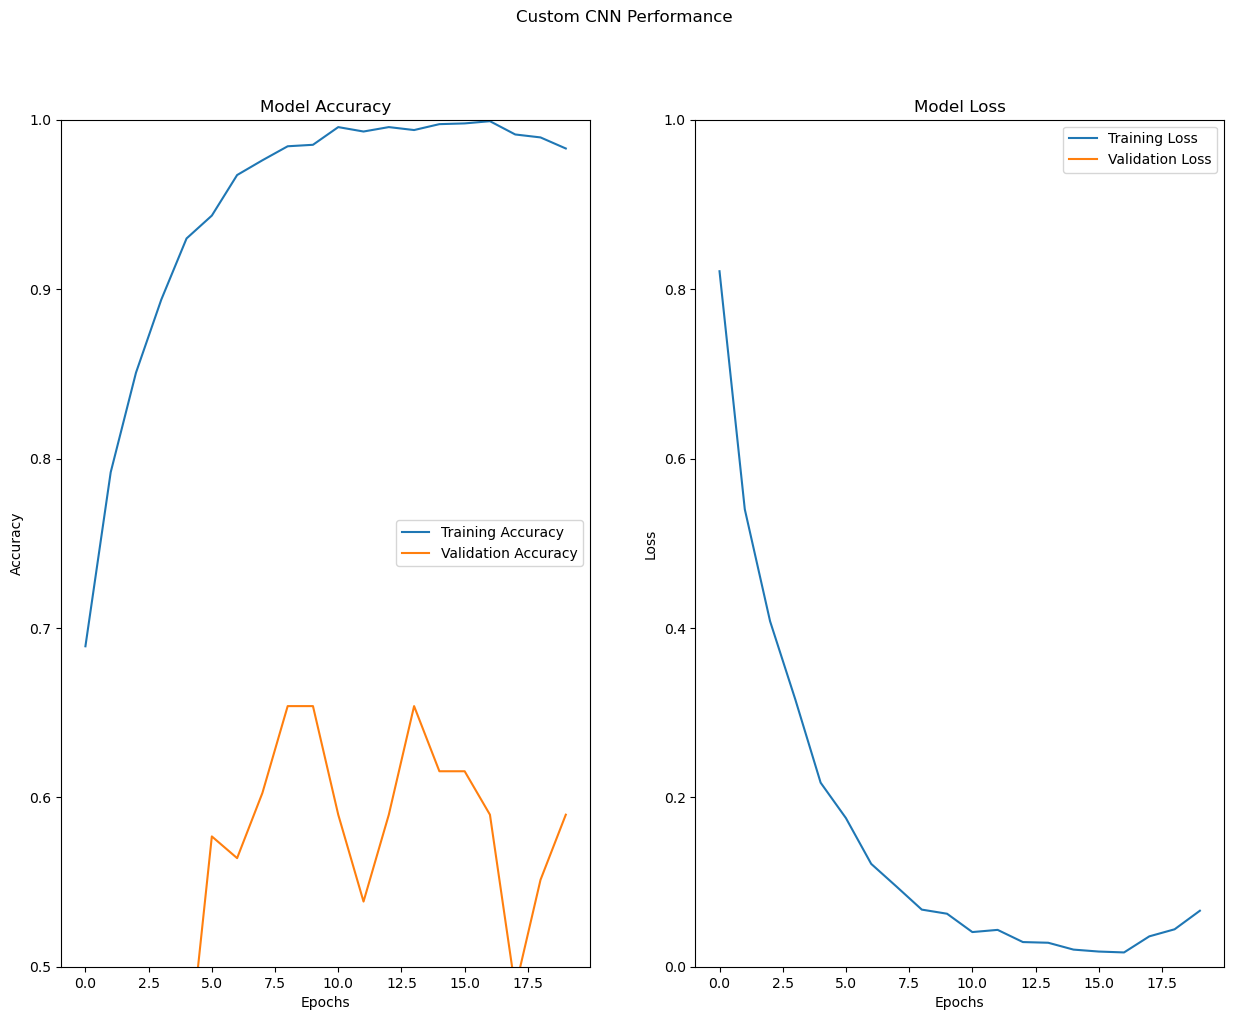

<Figure size 1000x700 with 0 Axes>

In [29]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,11)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [30]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)  # En yüksek olasılıklı sınıfın indekslerini alır
predictions = predictions.astype(int)  # int tipine dönüştürür
predictions[:5]

4/4 [==============================] - 3s 638ms/step


array([1, 1, 2, 2, 2])

1/1 [==============================] - 1s 927ms/step


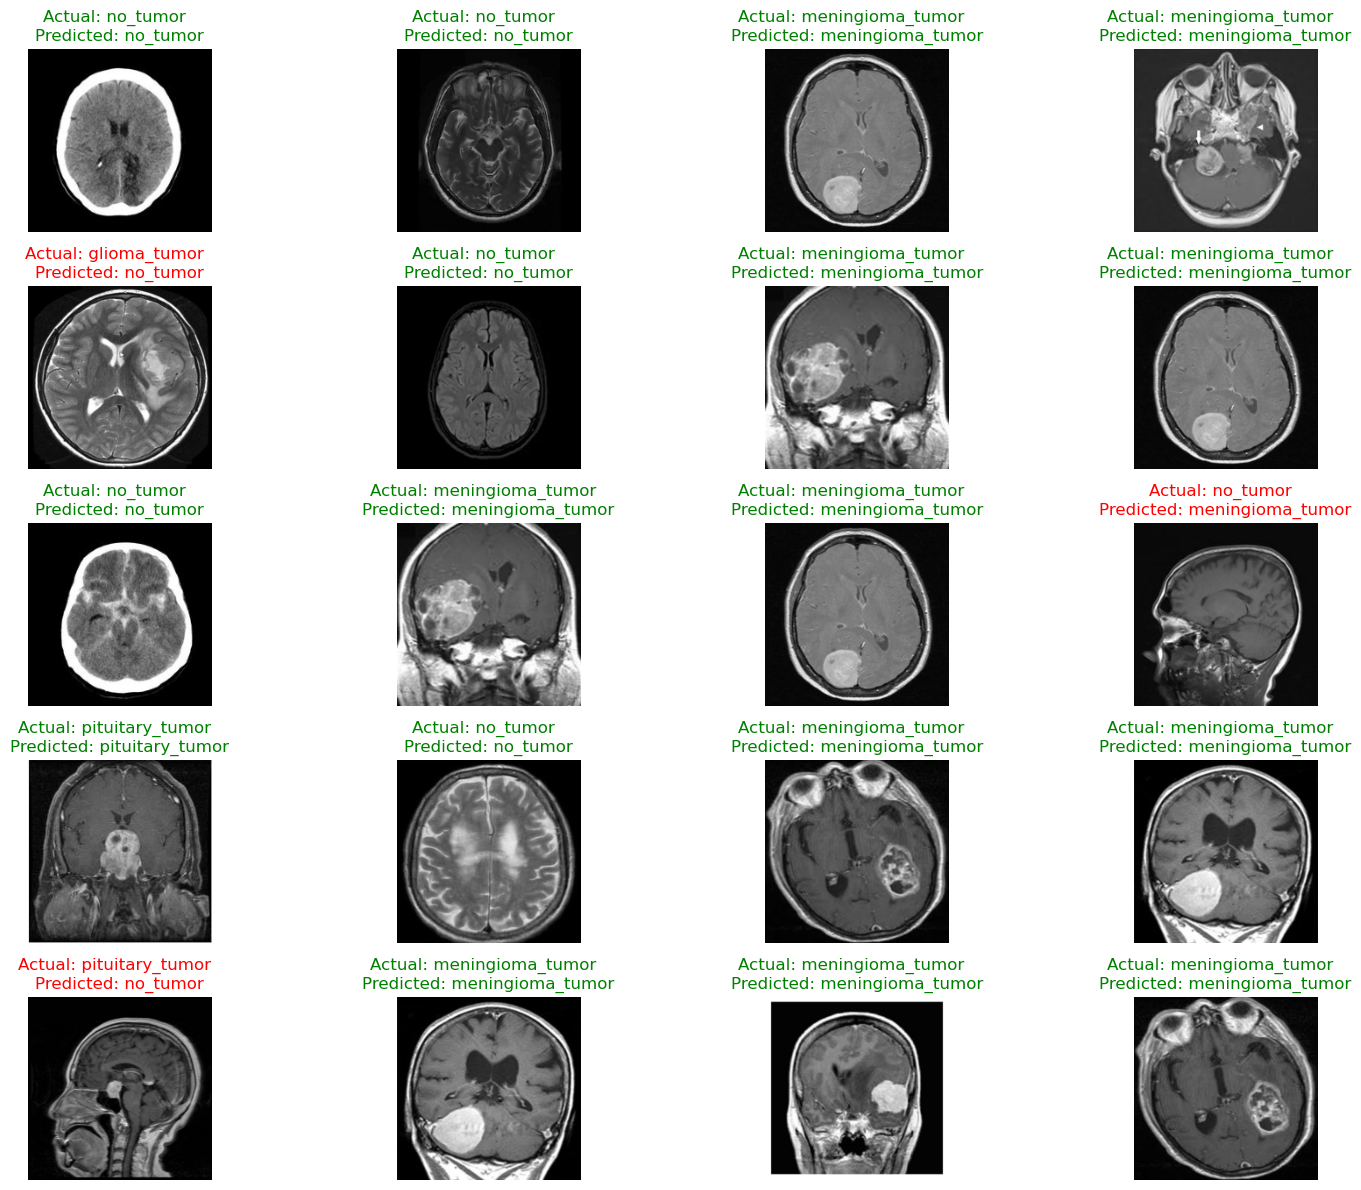

In [41]:
def map_pred(pred):
    return [list(train_dataset.class_indices.keys())[i] for i in pred]

a = 5
b = 4

fig,ax=plt.subplots(a,b)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(a):
    for j in range (b):
        aziz = rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[aziz])
        if labels[aziz] == predicts[aziz]:
            ax[i,j].set_title('Actual: ' + labels[aziz] + '  \nPredicted: ' + predicts[aziz] , color = 'green')
        else: 
            ax[i,j].set_title('Actual: ' + labels[aziz] + '  \nPredicted: ' +  predicts[aziz] , color = 'red')
        ax[i,j].axis("off")

plt.tight_layout()